## 2. 인구밀도가 높은 지역은 상대적으로 열지수가 높다.
- made by KHW

### 0. 전처리

**1. 인구밀도 데이터**

In [2]:
import pandas as pd

df_dens = pd.read_csv('./dataset/output/Daegu_density.csv', index_col=0)

df_dens

,행정구역,year,month,count,면적(km²),인구밀도
0,가창면,2010,10,9002,111.17,80.975083
1,가창면,2010,11,8969,111.17,80.678241
2,가창면,2010,12,8936,111.17,80.381398
3,가창면,2011,1,8892,111.17,79.985608
4,가창면,2011,2,8731,111.17,78.537375
...,...,...,...,...,...,...
19400,효목2동,2021,12,13167,0.72,18287.500000
19401,효목2동,2022,1,13121,0.72,18223.611111
19402,효목2동,2022,2,13098,0.72,18191.666667
19403,효목2동,2022,3,13070,0.72,18152.777778


**2. 기상 데이터**

In [3]:
df_weather = pd.read_csv('./output/daegu_pre.csv')

df_weather

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI,DI
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동,15.589444,60.743550
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동,17.245000,62.734310
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동,18.926668,64.650381
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동,20.006110,65.727719
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동,21.415557,67.046081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면,9.679444,52.335030
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면,9.852778,52.993500
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면,10.738333,54.402410
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면,12.179444,56.605980


**2-1. 사용할 column만 추출**

In [4]:
df_HI = df_weather[['region', 'year', 'month', 'HI']]

df_HI

,region,year,month,HI
0,동인동,2010,6,15.589444
1,동인동,2010,6,17.245000
2,동인동,2010,6,18.926668
3,동인동,2010,6,20.006110
4,동인동,2010,6,21.415557
...,...,...,...,...
14831611,구지면,2022,4,9.679444
14831612,구지면,2022,4,9.852778
14831613,구지면,2022,4,10.738333
14831614,구지면,2022,4,12.179444


**2-2. 파일 기간 통합을 위해 2010년 10월 이전의 row 삭제**

In [5]:
df_HI.drop(df_HI[(df_HI['year'] == 2010) & (df_HI['month'] < 10)].index, inplace=True)

df_HI

C:\Users\trap1\AppData\Local\Temp\ipykernel_6864\486867846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HI.drop(df_HI[(df_HI['year'] == 2010) & (df_HI['month'] < 10)].index, inplace=True)


,region,year,month,HI
2928,동인동,2010,10,14.079444
2929,동인동,2010,10,16.930000
2930,동인동,2010,10,18.339444
2931,동인동,2010,10,20.241110
2932,동인동,2010,10,21.603888
...,...,...,...,...
14831611,구지면,2022,4,9.679444
14831612,구지면,2022,4,9.852778
14831613,구지면,2022,4,10.738333
14831614,구지면,2022,4,12.179444


**2-3. 달별로 중복된 row를 region명으로 평균값 통합**

In [6]:
df_HI = df_HI.groupby(["region","year","month"]).mean().reset_index()

df_HI

,region,year,month,HI
0,가창면,2010,10,13.845480
1,가창면,2010,11,5.488938
2,가창면,2010,12,-0.149446
3,가창면,2011,1,-4.424866
4,가창면,2011,2,1.495823
...,...,...,...,...
19733,효목2동,2021,12,2.353966
19734,효목2동,2022,1,0.416735
19735,효목2동,2022,2,1.142232
19736,효목2동,2022,3,8.417064


**3. 안 겹치는 행정구역명이 있는지 확인하기 위해 outer join**

In [7]:
df_join = pd.merge(df_dens, df_HI, left_on=['행정구역','year','month'], right_on = ['region','year','month'], how='outer')

df_join

,행정구역,year,month,count,면적(km²),인구밀도,region,HI
0,가창면,2010,10,9002.0,111.17,80.975083,가창면,13.845480
1,가창면,2010,11,8969.0,111.17,80.678241,가창면,5.488938
2,가창면,2010,12,8936.0,111.17,80.381398,가창면,-0.149446
3,가창면,2011,1,8892.0,111.17,79.985608,가창면,-4.424866
4,가창면,2011,2,8731.0,111.17,78.537375,가창면,1.495823
...,...,...,...,...,...,...,...,...
19749,NaN,2019,8,NaN,NaN,NaN,혁신동,29.527123
19750,NaN,2019,9,NaN,NaN,NaN,혁신동,23.240009
19751,NaN,2019,10,NaN,NaN,NaN,혁신동,16.214514
19752,NaN,2019,11,NaN,NaN,NaN,혁신동,8.793609


**4. join한 파일의 null 값 확인**

In [8]:
df_join[df_join['행정구역'].isnull()]

,행정구역,year,month,count,면적(km²),인구밀도,region,HI
19405,NaN,2021,1,NaN,NaN,NaN,안심3.4동,0.003336
19406,NaN,2021,2,NaN,NaN,NaN,안심3.4동,3.872016
19407,NaN,2021,3,NaN,NaN,NaN,안심3.4동,8.767594
19408,NaN,2021,4,NaN,NaN,NaN,안심3.4동,12.899296
19409,NaN,2021,5,NaN,NaN,NaN,안심3.4동,16.945525
...,...,...,...,...,...,...,...,...
19749,NaN,2019,8,NaN,NaN,NaN,혁신동,29.527123
19750,NaN,2019,9,NaN,NaN,NaN,혁신동,23.240009
19751,NaN,2019,10,NaN,NaN,NaN,혁신동,16.214514
19752,NaN,2019,11,NaN,NaN,NaN,혁신동,8.793609


In [9]:
df_join[df_join['인구밀도'].isnull()]

,행정구역,year,month,count,면적(km²),인구밀도,region,HI
19405,NaN,2021,1,NaN,NaN,NaN,안심3.4동,0.003336
19406,NaN,2021,2,NaN,NaN,NaN,안심3.4동,3.872016
19407,NaN,2021,3,NaN,NaN,NaN,안심3.4동,8.767594
19408,NaN,2021,4,NaN,NaN,NaN,안심3.4동,12.899296
19409,NaN,2021,5,NaN,NaN,NaN,안심3.4동,16.945525
...,...,...,...,...,...,...,...,...
19749,NaN,2019,8,NaN,NaN,NaN,혁신동,29.527123
19750,NaN,2019,9,NaN,NaN,NaN,혁신동,23.240009
19751,NaN,2019,10,NaN,NaN,NaN,혁신동,16.214514
19752,NaN,2019,11,NaN,NaN,NaN,혁신동,8.793609


In [10]:
df_join[df_join['인구밀도'] == 0]

,행정구역,year,month,count,면적(km²),인구밀도,region,HI
13878,안심3.4동,2020,7,0.0,25.12,0.0,안심3.4동,23.572870
13879,안심3.4동,2020,8,0.0,25.12,0.0,안심3.4동,31.253171
13880,안심3.4동,2020,9,0.0,25.12,0.0,안심3.4동,21.014922
13881,안심3.4동,2020,10,0.0,25.12,0.0,안심3.4동,14.181374
13882,안심3.4동,2020,11,0.0,25.12,0.0,안심3.4동,8.109772
13883,안심3.4동,2020,12,0.0,25.12,0.0,안심3.4동,0.791274
13884,안심3동,2020,1,0.0,6.10,0.0,안심3동,3.070506
13885,안심3동,2020,2,0.0,6.10,0.0,안심3동,4.166382
13886,안심3동,2020,3,0.0,6.10,0.0,안심3동,8.294571
13887,안심3동,2020,4,0.0,6.10,0.0,안심3동,11.330940


* **JOIN한 테이블들의 unique값 점검**

In [11]:
set(df_dens['행정구역'].unique()) - set(df_HI['region'].unique())

{'유천동'}

In [12]:
# 
set(df_HI['region'].unique()) - set(df_dens['행정구역'].unique())

set()

**4-1. 안심3.4동, 안심3동, 안심4동, 혁신동 데이터 확인**
* 2020년을 6월을 기준으로 안심3.4동과 안심3동, 안심4동, 혁신동이 분리되어 있다.

조사
* 2020년 7월 6일 안심3·4동을 안심3동, 안심4동, 혁신동으로 분동  
출처 : https://ko.wikipedia.org/wiki/%EC%95%88%EC%8B%AC%EB%8F%99 

In [13]:
df_dens[(df_dens['행정구역']=='안심3.4동') & (df_dens['year']==2020)]

,행정구역,year,month,count,면적(km²),인구밀도
13872,안심3.4동,2020,1,69135,25.12,2752.189490
13873,안심3.4동,2020,2,69040,25.12,2748.407643
13874,안심3.4동,2020,3,69150,25.12,2752.786624
13875,안심3.4동,2020,4,69421,25.12,2763.574841
13876,안심3.4동,2020,5,69537,25.12,2768.192675
13877,안심3.4동,2020,6,69573,25.12,2769.625796
13878,안심3.4동,2020,7,0,25.12,0.000000
13879,안심3.4동,2020,8,0,25.12,0.000000
13880,안심3.4동,2020,9,0,25.12,0.000000
13881,안심3.4동,2020,10,0,25.12,0.000000


In [14]:
ansim_list = ['안심3동', '안심4동', '혁신동']

df_dens[(df_dens['행정구역'].isin(ansim_list)) & (df_dens['year']==2020)]

,행정구역,year,month,count,면적(km²),인구밀도
13884,안심3동,2020,1,0,6.10,0.000000
13885,안심3동,2020,2,0,6.10,0.000000
13886,안심3동,2020,3,0,6.10,0.000000
13887,안심3동,2020,4,0,6.10,0.000000
13888,안심3동,2020,5,0,6.10,0.000000
13889,안심3동,2020,6,0,6.10,0.000000
13890,안심3동,2020,7,21450,6.10,3516.393443
13891,안심3동,2020,8,21443,6.10,3515.245902
13892,안심3동,2020,9,21388,6.10,3506.229508
13893,안심3동,2020,10,21379,6.10,3504.754098


* **안심 3.4동은 2020년 7월부터 2022년까지의 값을 제거**

In [15]:
df_dens.drop(df_dens.loc[(df_dens['행정구역'] == '안심3.4동') & (df_dens['year'] == 2020) & (df_dens['month'] > 6)].index, inplace=True)

df_dens.drop(df_dens.loc[(df_dens['행정구역'] == '안심3.4동') & (df_dens['year'] > 2020)].index, inplace=True)

In [16]:
df_HI.drop(df_HI.loc[(df_HI['region'] == '안심3.4동') & (df_HI['year'] == 2020) & (df_HI['month'] > 6)].index, inplace=True)

df_HI.drop(df_HI.loc[(df_HI['region'] == '안심3.4동') & (df_HI['year'] > 2020)].index, inplace=True)

* **안심3동, 안심4동, 혁신동은 2010년부터 2020년 6월까지의 값을 제거**

In [17]:
df_dens.drop(df_dens.loc[(df_dens['행정구역'].isin(ansim_list)) & (df_dens['year'] == 2020) & (df_dens['month'] < 7)].index, inplace=True)

df_dens.drop(df_dens.loc[(df_dens['행정구역'].isin(ansim_list)) & (df_dens['year'] < 2020)].index, inplace=True)

In [18]:
df_HI.drop(df_HI.loc[(df_HI['region'].isin(ansim_list)) & (df_HI['year'] == 2020) & (df_HI['month'] < 7)].index, inplace=True)

df_HI.drop(df_HI.loc[(df_HI['region'].isin(ansim_list)) & (df_HI['year'] < 2020)].index, inplace=True)

* **확인**

In [19]:
df_dens[(df_dens['행정구역'].isin(ansim_list)) & (df_dens['year']==2020)]

,행정구역,year,month,count,면적(km²),인구밀도
13890,안심3동,2020,7,21450,6.10,3516.393443
13891,안심3동,2020,8,21443,6.10,3515.245902
13892,안심3동,2020,9,21388,6.10,3506.229508
13893,안심3동,2020,10,21379,6.10,3504.754098
13894,안심3동,2020,11,21380,6.10,3504.918033
13895,안심3동,2020,12,21337,6.10,3497.868852
13918,안심4동,2020,7,29515,2.53,11666.007905
13919,안심4동,2020,8,29515,2.53,11666.007905
13920,안심4동,2020,9,29453,2.53,11641.501976
13921,안심4동,2020,10,29409,2.53,11624.110672


In [20]:
df_dens[df_dens['인구밀도'] == 0]

,행정구역,year,month,count,면적(km²),인구밀도
14913,유천동,2021,1,0,1.25,0.0
14914,유천동,2021,2,0,1.25,0.0
14915,유천동,2021,3,0,1.25,0.0
14916,유천동,2021,4,0,1.25,0.0
14917,유천동,2021,5,0,1.25,0.0
14918,유천동,2021,6,0,1.25,0.0
14919,유천동,2021,7,0,1.25,0.0
14920,유천동,2021,8,0,1.25,0.0
14921,유천동,2021,9,0,1.25,0.0
14922,유천동,2021,10,0,1.25,0.0


**4-2. 유천동 데이터 확인**
* 로우 데이터에도 2021년 유천동의 인구수가 0이다. -> 전처리 과정은 문제가 없다.

조사
* 2021년 11월 29일 행정동 진천동과 월성1동에서 유천동으로 분동[9]  
출처 : https://ko.wikipedia.org/wiki/%EC%9C%A0%EC%B2%9C%EB%8F%99_(%EB%8C%80%EA%B5%AC)  


* 반면 유천동 신설로 월성1동 면적은 기존 2.57㎢에서 2.18㎢로 줄고,  
진천동도 5.97㎢에서 5.11㎢로 줄어들게 된다.  
출처 : http://news.imaeil.com/page/view/2021100616270719929

In [21]:
df_dens[df_dens['행정구역'] == '유천동']

,행정구역,year,month,count,면적(km²),인구밀도
14913,유천동,2021,1,0,1.25,0.0
14914,유천동,2021,2,0,1.25,0.0
14915,유천동,2021,3,0,1.25,0.0
14916,유천동,2021,4,0,1.25,0.0
14917,유천동,2021,5,0,1.25,0.0
14918,유천동,2021,6,0,1.25,0.0
14919,유천동,2021,7,0,1.25,0.0
14920,유천동,2021,8,0,1.25,0.0
14921,유천동,2021,9,0,1.25,0.0
14922,유천동,2021,10,0,1.25,0.0


* **df_HI에는 유천동이 없음**

In [22]:
df_HI[df_HI['region'] == '유천동']

,region,year,month,HI


* **df_HI에 유천동이 없기 때문에 df_dens에서 제거**

In [23]:
df_dens.drop(df_dens[(df_dens['행정구역'] == '유천동')].index, inplace=True)

df_dens[(df_dens['행정구역'] == '유천동')]

,행정구역,year,month,count,면적(km²),인구밀도


**4-3. 월성1동 데이터 확인**

In [24]:
df_dens[df_dens['행정구역'] == '월성1동']

,행정구역,year,month,count,면적(km²),인구밀도
14496,월성1동,2010,10,34033,2.18,15611.467890
14497,월성1동,2010,11,34653,2.18,15895.871560
14498,월성1동,2010,12,35528,2.18,16297.247706
14499,월성1동,2011,1,36154,2.18,16584.403670
14500,월성1동,2011,2,36902,2.18,16927.522936
...,...,...,...,...,...,...
14630,월성1동,2021,12,37326,2.18,17122.018349
14631,월성1동,2022,1,37186,2.18,17057.798165
14632,월성1동,2022,2,37109,2.18,17022.477064
14633,월성1동,2022,3,37011,2.18,16977.522936


* **2021년 10월까지의 면적을 2.57로 변경하고 인구밀도도 재계산**

In [25]:
WS_filter = ((df_dens['행정구역'] == '월성1동') & (df_dens['year'] == 2021) & (df_dens['month'] < 11)) | ((df_dens['행정구역'] == '월성1동') & (df_dens['year'] < 2021))

df_dens.loc[WS_filter, '면적(km²)'] = 2.57

df_dens.loc[WS_filter, '인구밀도'] = df_dens.loc[WS_filter, 'count'] / df_dens.loc[WS_filter, '면적(km²)']

# 확인

df_dens[df_dens['행정구역'] == '월성1동']

,행정구역,year,month,count,면적(km²),인구밀도
14496,월성1동,2010,10,34033,2.57,13242.412451
14497,월성1동,2010,11,34653,2.57,13483.657588
14498,월성1동,2010,12,35528,2.57,13824.124514
14499,월성1동,2011,1,36154,2.57,14067.704280
14500,월성1동,2011,2,36902,2.57,14358.754864
...,...,...,...,...,...,...
14630,월성1동,2021,12,37326,2.18,17122.018349
14631,월성1동,2022,1,37186,2.18,17057.798165
14632,월성1동,2022,2,37109,2.18,17022.477064
14633,월성1동,2022,3,37011,2.18,16977.522936


**4-4. 진천동 데이터 확인**

In [26]:
df_dens[df_dens['행정구역'] == '진천동']

,행정구역,year,month,count,면적(km²),인구밀도
16319,진천동,2010,10,52779,5.97,8840.703518
16320,진천동,2010,11,52775,5.97,8840.033501
16321,진천동,2010,12,52740,5.97,8834.170854
16322,진천동,2011,1,52696,5.97,8826.800670
16323,진천동,2011,2,52674,5.97,8823.115578
...,...,...,...,...,...,...
16453,진천동,2021,12,51502,5.97,8626.800670
16454,진천동,2022,1,51348,5.97,8601.005025
16455,진천동,2022,2,51254,5.97,8585.259631
16456,진천동,2022,3,51098,5.97,8559.128978


* **2021년 10월 이후의 면적을 2.57로 변경하고 인구밀도도 재계산**

In [27]:
JC_filter = ((df_dens['행정구역'] == '진천동') & (df_dens['year'] == 2021) & (df_dens['month'] >= 11)) | ((df_dens['행정구역'] == '진천동') & (df_dens['year'] > 2021))

df_dens.loc[JC_filter, '면적(km²)'] = 5.11

df_dens.loc[JC_filter, '인구밀도'] = df_dens.loc[JC_filter, 'count'] / df_dens.loc[JC_filter, '면적(km²)']

# 확인

df_dens[df_dens['행정구역'] == '진천동']

,행정구역,year,month,count,면적(km²),인구밀도
16319,진천동,2010,10,52779,5.97,8840.703518
16320,진천동,2010,11,52775,5.97,8840.033501
16321,진천동,2010,12,52740,5.97,8834.170854
16322,진천동,2011,1,52696,5.97,8826.800670
16323,진천동,2011,2,52674,5.97,8823.115578
...,...,...,...,...,...,...
16453,진천동,2021,12,51502,5.11,10078.669276
16454,진천동,2022,1,51348,5.11,10048.532290
16455,진천동,2022,2,51254,5.11,10030.136986
16456,진천동,2022,3,51098,5.11,9999.608611


In [28]:
df_dens

,행정구역,year,month,count,면적(km²),인구밀도
0,가창면,2010,10,9002,111.17,80.975083
1,가창면,2010,11,8969,111.17,80.678241
2,가창면,2010,12,8936,111.17,80.381398
3,가창면,2011,1,8892,111.17,79.985608
4,가창면,2011,2,8731,111.17,78.537375
...,...,...,...,...,...,...
19400,효목2동,2021,12,13167,0.72,18287.500000
19401,효목2동,2022,1,13121,0.72,18223.611111
19402,효목2동,2022,2,13098,0.72,18191.666667
19403,효목2동,2022,3,13070,0.72,18152.777778


**5. 전처리 완료 데이터 JOIN 후 저장**

In [29]:
df_join = pd.merge(df_dens, df_HI, left_on=['행정구역','year','month'], right_on = ['region','year','month'], how='outer')

df_join

,행정구역,year,month,count,면적(km²),인구밀도,region,HI
0,가창면,2010,10,9002,111.17,80.975083,가창면,13.845480
1,가창면,2010,11,8969,111.17,80.678241,가창면,5.488938
2,가창면,2010,12,8936,111.17,80.381398,가창면,-0.149446
3,가창면,2011,1,8892,111.17,79.985608,가창면,-4.424866
4,가창면,2011,2,8731,111.17,78.537375,가창면,1.495823
...,...,...,...,...,...,...,...,...
19360,효목2동,2021,12,13167,0.72,18287.500000,효목2동,2.353966
19361,효목2동,2022,1,13121,0.72,18223.611111,효목2동,0.416735
19362,효목2동,2022,2,13098,0.72,18191.666667,효목2동,1.142232
19363,효목2동,2022,3,13070,0.72,18152.777778,효목2동,8.417064


* **null값 확인**

In [ ]:
df_join[df_join['HI'].isnull()]

,행정구역,year,month,count,면적(km²),인구밀도,region,HI


In [ ]:
df_join[df_join['인구밀도'].isnull()]

,행정구역,year,month,count,면적(km²),인구밀도,region,HI


In [ ]:
df_join[df_join['행정구역'].isnull()]

,행정구역,year,month,count,면적(km²),인구밀도,region,HI


In [ ]:
df_join[df_join['region'].isnull()]

,행정구역,year,month,count,면적(km²),인구밀도,region,HI


* **저장**

In [ ]:
df_join.to_csv('./dataset/pop_density/Daegu_density+HI.csv')

### 1. 기간별 인구밀도와 열지수의 상관관계 분석

##### **0. 데이터 불러오기 및 설정**

In [ ]:
# 한글 출력 오류
system_name = platform.system()
if system_name == 'Windows':
    # Windows 운영체제
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    # Mac OS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    # Linux
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

In [ ]:
df_EDA2 = pd.read_csv('./dataset/output/Daegu_density+HI.csv', index_col=0)

df_EDA2

,행정구역,year,month,count,면적(km²),인구밀도,region,HI
0,가창면,2010,10,9002,111.17,80.975083,가창면,13.845480
1,가창면,2010,11,8969,111.17,80.678241,가창면,5.488938
2,가창면,2010,12,8936,111.17,80.381398,가창면,-0.149446
3,가창면,2011,1,8892,111.17,79.985608,가창면,-4.424866
4,가창면,2011,2,8731,111.17,78.537375,가창면,1.495823
...,...,...,...,...,...,...,...,...
19360,효목2동,2021,12,13167,0.72,18287.500000,효목2동,2.353966
19361,효목2동,2022,1,13121,0.72,18223.611111,효목2동,0.416735
19362,효목2동,2022,2,13098,0.72,18191.666667,효목2동,1.142232
19363,효목2동,2022,3,13070,0.72,18152.777778,효목2동,8.417064


**1. 전체 기간에서의 상관관계**

In [ ]:
EDA2_corr = df_EDA2.corr()

EDA2_corr

,year,month,count,면적(km²),인구밀도,HI
year,1.000000,-0.107872,-0.025832,-0.001451,-0.068907,0.007140
month,-0.107872,1.000000,0.000820,-0.000023,0.001415,0.236342
count,-0.025832,0.000820,1.000000,0.139146,-0.062834,-0.010850
면적(km²),-0.001451,-0.000023,0.139146,1.000000,-0.464588,-0.012811
인구밀도,-0.068907,0.001415,-0.062834,-0.464588,1.000000,0.005566
HI,0.007140,0.236342,-0.010850,-0.012811,0.005566,1.000000


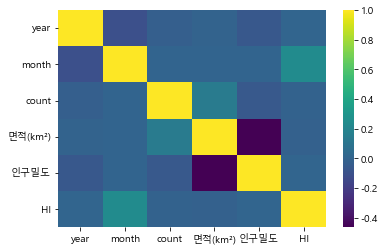

In [ ]:
matplotlib.rcParams['axes.unicode_minus'] = False
sns.heatmap(EDA2_corr, cmap='viridis')
plt.show()

# 유의미한 상관관계를 관찰하기 어렵다.

**2. 열지수가 높은 월의 상관관계 (6, 7, 8월)**

* **열지수 평균 상위 3개 월 선정**

<AxesSubplot:xlabel='month', ylabel='HI'>

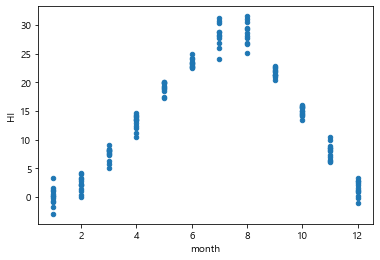

In [ ]:
df_EDA2_by_Mean = df_EDA2.groupby(['year', 'month']).mean().reset_index()

df_EDA2_by_Mean.plot(kind = 'scatter', x='month', y='HI')

In [ ]:
df_EDA2_high3 = df_EDA2[(df_EDA2['month'] > 5) & (df_EDA2['month'] < 9)]

df_EDA2_high3

,행정구역,year,month,count,면적(km²),인구밀도,region,HI
8,가창면,2011,6,8537,111.17,76.792300,가창면,22.835380
9,가창면,2011,7,8517,111.17,76.612395,가창면,26.490325
10,가창면,2011,8,8502,111.17,76.477467,가창면,26.029766
20,가창면,2012,6,8379,111.17,75.371053,가창면,21.066469
21,가창면,2012,7,8356,111.17,75.164163,가창면,27.048217
...,...,...,...,...,...,...,...,...
19343,효목2동,2020,7,14845,0.72,20618.055556,효목2동,23.855839
19344,효목2동,2020,8,14747,0.72,20481.944444,효목2동,31.181261
19354,효목2동,2021,6,13508,0.72,18761.111111,효목2동,23.148351
19355,효목2동,2021,7,13412,0.72,18627.777778,효목2동,28.025284


* **그래프**

In [ ]:
df_EDA2_corr_2 = df_EDA2_high3.corr()

df_EDA2_corr_2

,year,month,count,면적(km²),인구밀도,HI
year,1.000000,0.000672,-0.022841,-0.001355,-0.066598,-0.007839
month,0.000672,1.000000,-0.001040,-0.000229,-0.001524,0.727295
count,-0.022841,-0.001040,1.000000,0.137750,-0.061742,-0.044024
면적(km²),-0.001355,-0.000229,0.137750,1.000000,-0.464766,-0.039832
인구밀도,-0.066598,-0.001524,-0.061742,-0.464766,1.000000,0.016607
HI,-0.007839,0.727295,-0.044024,-0.039832,0.016607,1.000000


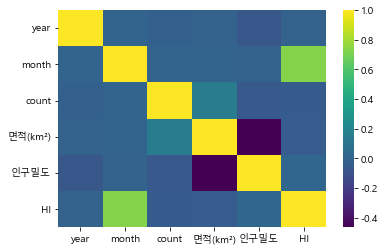

In [ ]:
matplotlib.rcParams['axes.unicode_minus'] = False
sns.heatmap(df_EDA2_corr_2, cmap='viridis')
plt.show()

# 유의미한 상관관계를 관찰하기 어렵다.

### 2. 최대 열지수와 최대 인구밀도의 상관관계 분석

* **열지수와 인구밀도 상위 100개의 값 추출**

In [ ]:
df_EDA2_by_Max = df_EDA2.groupby(['행정구역','year', 'month']).max().reset_index()

# df_EDA2_by_Max.plot(kind = 'scatter', x='month', y='HI')

df_EDA2_by_Max

,행정구역,year,month,count,면적(km²),인구밀도,region,HI
0,가창면,2010,10,9002,111.17,80.975083,가창면,13.845480
1,가창면,2010,11,8969,111.17,80.678241,가창면,5.488938
2,가창면,2010,12,8936,111.17,80.381398,가창면,-0.149446
3,가창면,2011,1,8892,111.17,79.985608,가창면,-4.424866
4,가창면,2011,2,8731,111.17,78.537375,가창면,1.495823
...,...,...,...,...,...,...,...,...
19360,효목2동,2021,12,13167,0.72,18287.500000,효목2동,2.353966
19361,효목2동,2022,1,13121,0.72,18223.611111,효목2동,0.416735
19362,효목2동,2022,2,13098,0.72,18191.666667,효목2동,1.142232
19363,효목2동,2022,3,13070,0.72,18152.777778,효목2동,8.417064


In [ ]:
df_EDA2_top =df_EDA2_by_Max.sort_values(by=['HI', '인구밀도'], ascending=False).head(100)

df_EDA2_top

,행정구역,year,month,count,면적(km²),인구밀도,region,HI
3037,논공읍,2020,8,18486,43.87,421.381354,논공읍,32.707299
18788,화원읍,2020,8,48338,27.68,1746.315029,화원읍,32.685176
14040,옥포읍,2020,8,25336,48.94,517.695137,옥포읍,32.685176
3012,논공읍,2018,7,18037,43.87,411.146569,논공읍,32.512219
12603,신암2동,2018,7,11988,0.38,31547.368421,신암2동,32.241110
...,...,...,...,...,...,...,...,...
12047,수성2.3가동,2018,7,12656,0.65,19470.769231,수성2.3가동,32.034165
8294,봉덕1동,2018,7,9187,0.49,18748.979592,봉덕1동,32.034165
2178,남산3동,2018,7,7132,0.40,17830.000000,남산3동,32.034165
7182,범어1동,2018,7,17020,1.09,15614.678899,범어1동,32.034165


* **그래프**

In [ ]:
df_EDA2_top_corr = df_EDA2_top.corr()

df_EDA2_top_corr

,year,month,count,면적(km²),인구밀도,HI
year,1.000000,1.000000,-0.057439,-0.036626,-0.122476,-0.153772
month,1.000000,1.000000,-0.057439,-0.036626,-0.122476,-0.153772
count,-0.057439,-0.057439,1.000000,0.324519,-0.098340,0.305903
면적(km²),-0.036626,-0.036626,0.324519,1.000000,-0.502768,0.419476
인구밀도,-0.122476,-0.122476,-0.098340,-0.502768,1.000000,-0.393707
HI,-0.153772,-0.153772,0.305903,0.419476,-0.393707,1.000000


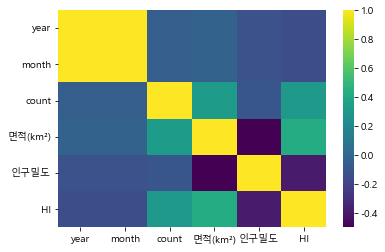

In [ ]:
matplotlib.rcParams['axes.unicode_minus'] = False
sns.heatmap(df_EDA2_top_corr, cmap='viridis')
plt.show()

-------------------
**그래프 관찰결과**
* 열지수 상위 100개의 경우에는 전체 데이터보다 상관관계가 더 명확하다.  


* 면적과 열지수의 상관관계가 가장 유의미하고 다음으로 인구밀도, 인구수의 상관관계가 높다.  
특이한 사실은 인구밀도와 열지수는 음의 상관관계를 보인다는 점이다.
-------------------


### 3. 결론

* 전체 데이터에서는 유의미한 상관관계를 발견할 수 없었다.  


* 전체 데이터보다 열지수 상위 100개의 경우 상관관계가 더 뚜렷하지만 유의미한 정도는 아니다.  


* 열지수 상위 100개의 경우 인구밀도와 열지수는 음의 상관관계를 보인다.  
(열지수가 높을수록 인구밀도가 낮다.)

**모든 월과 평균 기온이 높은 월에서 인구밀도와 열지수는 유의미한 상관관계가 없다.**  


**열지수 상위 100개의 경우 열지수가 높을수록 인구밀도가 낮은 음의 상관관계가 관찰되었다.**  


**따라서 '인구밀도가 높은 지역은 상대적으로 열지수가 높다'는 가설을 기각한다.**